In [24]:
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
# Train and test datasets
X_train = [[1,2],[3,4],[5,6]]
y_train = [1,3,5]
X_test = [[7,8],[9,10]]
y_test = [7,9]

In [3]:
list_of_models = [("Linear Regression", linear_model.LinearRegression())]

In [17]:
metrics_fns = [("r2", r2_score), ("mse", mean_squared_error)]

In [21]:
def print_metrics(preds, y):
    metrics_list = []
    for label, fn in metrics_fns:
        metric = fn(preds, y_test)
        print(label, ": ", metric)
        metrics_list.append(metric)
    return metrics_list

In [37]:
def loop_through_models(list_of_models, X_train, y_train, X_test, y_test, id=""):
    for label, model in list_of_models:
        # Initialise vars
        records = [label]
        
        # Fit model
        model.fit(X_train, y_train)
        
        # Predict on test set
        preds = model.predict(X_test)
        
        # Print accuracy metrics
        metrics = print_metrics(preds, y_test)
        records.extend(metrics)
        
        # Print predictions
        print(preds[:10], y_test[:10])
        records.extend([preds[:10], y_test[:10]])
        
        # TODO: save plot of distribution of predictions
        distplot = sns.distplot(preds)
        plt.savefig(id + label)
        
        # TODO: 
        return records
    

r2 :  1.0
mse :  6.70531769438e-30
[ 7.  9.] [7, 9]


/Users/jessica/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


['Linear Regression', 1.0, 6.7053176943786003e-30, array([ 7.,  9.]), [7, 9]]

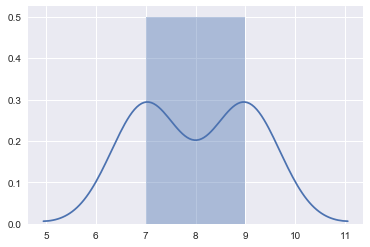

In [38]:
loop_through_models(list_of_models, X_train, y_train, X_test, y_test, id="test")